In [40]:
from tumor_model.model import TumorModel, compute_MTD
from mesa.batchrunner import BatchRunner
import numpy as np

fixed_params = {
    "width": 20,
    "height": 20,
    "treatment_cycles": 0,
    "initial_tumor_size": 8 # 40mm
}

variable_params = {
    "param_scale": np.linspace(0.5, 1.0, num=10)
}

batch_run = BatchRunner(
    TumorModel,
    variable_params,
    fixed_params,
    iterations=10,
    max_steps=85,
    model_reporters={"MTD": compute_MTD}
)

batch_run.run_all()

100it [05:24,  3.24s/it]


,param_scale,Run,MTD,width,height,treatment_cycles,initial_tumor_size
0,0.5,0,63.835727,20,20,0,8
1,0.5,1,62.649820,20,20,0,8
2,0.5,2,67.268120,20,20,0,8
3,0.5,3,60.621778,20,20,0,8
4,0.5,4,60.827625,20,20,0,8
...,...,...,...,...,...,...,...
95,1.0,95,73.143694,20,20,0,8
96,1.0,96,75.166482,20,20,0,8
97,1.0,97,71.937473,20,20,0,8
98,1.0,98,68.920244,20,20,0,8


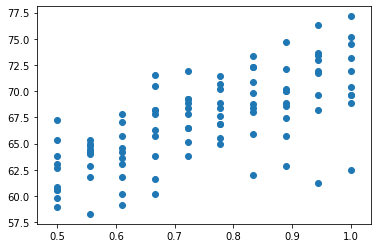

In [41]:
import matplotlib.pyplot as plt

run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.param_scale, run_data.MTD)
run_data

In [42]:
df = run_data[['param_scale','MTD']]
df.groupby('param_scale').agg(['var', 'mean'])

MTD           
                   var       mean
param_scale                      
0.500000      6.950273  62.299637
0.555556      4.455661  63.529441
0.611111      7.829063  63.741304
0.666667     13.377373  66.411297
0.722222      5.430787  67.768815
0.777778      4.659414  68.160154
0.833333     11.463699  69.171401
0.888889     10.671138  69.049953
0.944444     17.487895  71.268934
1.000000     17.046690  71.289256